<a href="https://colab.research.google.com/github/SUDHARSSHINI/Responsible-AI-1/blob/main/Responsible_AI_churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset
data = pd.read_csv('/content/Churn_Modelling.csv')

# Define features and target
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Define a function to predict churn from user input
def predict_churn_from_input():
    # Get user input for each feature
    credit_score = int(input("Enter the customer's credit score (300-850): "))
    geography = input("Enter the customer's geography (France, Germany, Spain): ")
    gender = input("Enter the customer's gender (Male, Female): ")
    age = int(input("Enter the customer's age (18-100): "))
    tenure = int(input("Enter the customer's tenure (in years, 0-10): "))
    balance = float(input("Enter the customer's account balance: "))
    num_of_products = int(input("Enter the number of bank products used by the customer (1-4): "))
    has_cr_card = int(input("Does the customer have a credit card? (Enter 1 for yes, 0 for no): "))
    is_active_member = int(input("Is the customer an active member? (Enter 1 for yes, 0 for no): "))
    estimated_salary = float(input("Enter the customer's estimated salary: "))

    # Create a DataFrame from the user input
    input_data = pd.DataFrame({
        'CreditScore': [credit_score],
        'Geography': [geography],
        'Gender': [gender],
        'Age': [age],
        'Tenure': [tenure],
        'Balance': [balance],
        'NumOfProducts': [num_of_products],
        'HasCrCard': [has_cr_card],
        'IsActiveMember': [is_active_member],
        'EstimatedSalary': [estimated_salary]
    })

    # Convert input data to the same format as training data
    input_data = pd.get_dummies(input_data, columns=['Geography', 'Gender'], drop_first=True)
    input_data = input_data.reindex(columns=X.columns, fill_value=0)
    input_features = sc.transform(input_data)

    # Predict churn
    churn_prediction = model.predict(input_features)
    churn_prediction_human_readable = np.where(churn_prediction == 1, 'Churn', 'No Churn')

    print(f"The predicted churn status for the customer is: {churn_prediction_human_readable[0]}")

# Call the function to test
predict_churn_from_input()
25


Accuracy: 0.81
Enter the customer's credit score (300-850): 350
Enter the customer's geography (France, Germany, Spain): spain
Enter the customer's gender (Male, Female): Male
Enter the customer's age (18-100): 20
Enter the customer's tenure (in years, 0-10): 8
Enter the customer's account balance: 890789
Enter the number of bank products used by the customer (1-4): 3
Does the customer have a credit card? (Enter 1 for yes, 0 for no): 0
Is the customer an active member? (Enter 1 for yes, 0 for no): 0
Enter the customer's estimated salary: 5678
The predicted churn status for the customer is: No Churn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset
data = pd.read_csv('/content/Churn_Modelling.csv')

# Define features and target
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy:.2f}')

# Calculate accuracy for each subgroup
def subgroup_accuracy(X, y, subgroup_col, model):
    if subgroup_col in X.columns:
        subgroups = X[subgroup_col].unique()
        for subgroup in [0, 1]:  # Assuming binary encoded subgroups
            indices = X[X[subgroup_col] == subgroup].index
            if len(indices) > 0:
                y_true = y.loc[indices]
                X_subgroup = X.loc[indices]
                X_subgroup_scaled = sc.transform(X_subgroup)
                y_pred = model.predict(X_subgroup_scaled)
                acc = accuracy_score(y_true, y_pred)
                print(f'Accuracy for {subgroup_col} = {subgroup}: {acc:.2f}')
            else:
                print(f"No samples found for {subgroup_col} = {subgroup}")
    else:
        print(f"Column {subgroup_col} not found in X")

# Evaluate bias by subgroup accuracy
subgroup_accuracy(X_test, y_test, 'Geography_Germany', model)
subgroup_accuracy(X_test, y_test, 'Geography_Spain', model)
subgroup_accuracy(X_test, y_test, 'Gender_Male', model)

# Calculate disparate impact
def disparate_impact(y_pred, sensitive_feature):
    if sensitive_feature in X_test.columns:
        favorable_outcome = (y_pred == 0)  # Assume 0 is the favorable outcome (no churn)
        majority_group = X_test[sensitive_feature] == 0
        minority_group = X_test[sensitive_feature] == 1

        majority_outcome_rate = favorable_outcome[majority_group].mean()
        minority_outcome_rate = favorable_outcome[minority_group].mean()

        disparate_impact_value = minority_outcome_rate / majority_outcome_rate
        print(f'Disparate Impact for {sensitive_feature}: {disparate_impact_value:.2f}')
    else:
        print(f"Column {sensitive_feature} not found in X")

# Evaluate disparate impact for gender
disparate_impact(y_pred, 'Gender_Male')

# Define a function to predict churn from user input
def predict_churn_from_input():
    # Get user input for each feature
    credit_score = int(input("Enter the customer's credit score (300-850): "))
    geography = input("Enter the customer's geography (France, Germany, Spain): ")
    gender = input("Enter the customer's gender (Male, Female): ")
    age = int(input("Enter the customer's age (18-100): "))
    tenure = int(input("Enter the customer's tenure (in years, 0-10): "))
    balance = float(input("Enter the customer's account balance: "))
    num_of_products = int(input("Enter the number of bank products used by the customer (1-4): "))
    has_cr_card = int(input("Does the customer have a credit card? (Enter 1 for yes, 0 for no): "))
    is_active_member = int(input("Is the customer an active member? (Enter 1 for yes, 0 for no): "))
    estimated_salary = float(input("Enter the customer's estimated salary: "))

    # Create a DataFrame from the user input
    input_data = pd.DataFrame({
        'CreditScore': [credit_score],
        'Geography': [geography],
        'Gender': [gender],
        'Age': [age],
        'Tenure': [tenure],
        'Balance': [balance],
        'NumOfProducts': [num_of_products],
        'HasCrCard': [has_cr_card],
        'IsActiveMember': [is_active_member],
        'EstimatedSalary': [estimated_salary]
    })

    # Convert input data to the same format as training data
    input_data = pd.get_dummies(input_data, columns=['Geography', 'Gender'], drop_first=True)
    input_data = input_data.reindex(columns=X.columns, fill_value=0)
    input_features = sc.transform(input_data)

    # Predict churn
    churn_prediction = model.predict(input_features)
    churn_prediction_human_readable = np.where(churn_prediction == 1, 'Churn', 'No Churn')

    print(f"The predicted churn status for the customer is: {churn_prediction_human_readable[0]}")

# Call the function to test
# predict_churn_from_input()


Overall Accuracy: 0.81
Accuracy for Geography_Germany = 0: 0.84
Accuracy for Geography_Germany = 1: 0.71
Accuracy for Geography_Spain = 0: 0.80
Accuracy for Geography_Spain = 1: 0.85
Accuracy for Gender_Male = 0: 0.77
Accuracy for Gender_Male = 1: 0.84
Disparate Impact for Gender_Male: 1.09


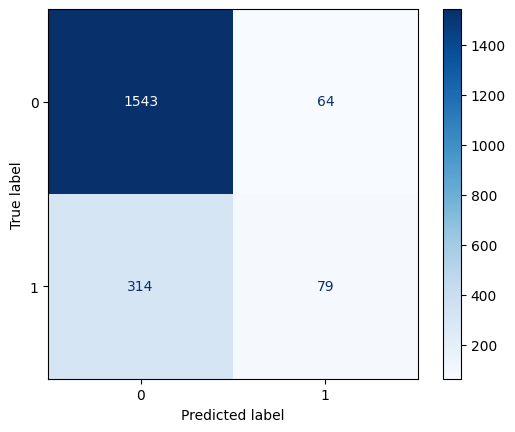

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')



In [ ]:
# Add predictions to the test set
X_test_orig = data.iloc[X_test.index]  # Original test data
X_test_orig['y_true'] = y_test
X_test_orig['y_pred'] = y_pred

# Error analysis by gender
gender_errors = X_test_orig[X_test_orig['y_true'] != X_test_orig['y_pred']].groupby('Gender').size()
print("Errors by Gender:\n", gender_errors)

# Error analysis by geography
geo_errors = X_test_orig[X_test_orig['y_true'] != X_test_orig['y_pred']].groupby('Geography').size()
print("Errors by Geography:\n", geo_errors)


Errors by Gender:
 Gender
Female    208
Male      170
dtype: int64
Errors by Geography:
 Geography
France     162
Germany    144
Spain       72
dtype: int64


<ipython-input-9-f6db0439c421>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_orig['y_true'] = y_test
<ipython-input-9-f6db0439c421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_orig['y_pred'] = y_pred


In [ ]:
# Display the column names of the DataFrame
print(X_test_orig.columns)
import pandas as pd



Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'y_true', 'y_pred', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [ ]:
# Display the column names of the DataFrame
print(X_test_orig.columns)
# Apply one-hot encoding if not already done
X_test_orig = pd.get_dummies(X_test_orig, columns=['Gender', 'Geography'], drop_first=True)



Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'y_true', 'y_pred'],
      dtype='object')


In [ ]:
# Check if columns exist
expected_columns = ['Gender_Male', 'Geography_Germany', 'Geography_Spain', 'y_pred']
missing_columns = [col for col in expected_columns if col not in X_test_orig.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")

# Calculate disparate impact for gender
positive_outcomes_male = X_test_orig[(X_test_orig['Gender_Male'] == 1) & (X_test_orig['y_pred'] == 1)].shape[0]
positive_outcomes_female = X_test_orig[(X_test_orig['Gender_Male'] == 0) & (X_test_orig['y_pred'] == 1)].shape[0]

if positive_outcomes_male != 0:
    disparate_impact_gender = positive_outcomes_female / positive_outcomes_male
else:
    disparate_impact_gender = float('inf')  # handle division by zero

print(f"Disparate Impact (Gender Female/Male): {disparate_impact_gender:.2f}")

# Calculate disparate impact for geography
positive_outcomes_france = X_test_orig[(X_test_orig['Geography_Germany'] == 0) & (X_test_orig['Geography_Spain'] == 0) & (X_test_orig['y_pred'] == 1)].shape[0]
positive_outcomes_germany = X_test_orig[(X_test_orig['Geography_Germany'] == 1) & (X_test_orig['y_pred'] == 1)].shape[0]
positive_outcomes_spain = X_test_orig[(X_test_orig['Geography_Spain'] == 1) & (X_test_orig['y_pred'] == 1)].shape[0]

if positive_outcomes_germany != 0:
    disparate_impact_geo_fr_de = positive_outcomes_france / positive_outcomes_germany
else:
    disparate_impact_geo_fr_de = float('inf')  # handle division by zero

if positive_outcomes_spain != 0:
    disparate_impact_geo_fr_sp = positive_outcomes_france / positive_outcomes_spain
else:
    disparate_impact_geo_fr_sp = float('inf')  # handle division by zero

print(f"Disparate Impact (Geography France/Germany): {disparate_impact_geo_fr_de:.2f}")
print(f"Disparate Impact (Geography France/Spain): {disparate_impact_geo_fr_sp:.2f}")


Disparate Impact (Gender Female/Male): 2.86
Disparate Impact (Geography France/Germany): 0.16
Disparate Impact (Geography France/Spain): 1.00


In [ ]:
import plotly.graph_objects as go

# Accuracy and fairness metrics
accuracy = accuracy_score(y_test, y_pred)
disparate_impact = {
    'Gender Female/Male': disparate_impact_gender,
    'Geography France/Germany': disparate_impact_geo_fr_de,
    'Geography France/Spain': disparate_impact_geo_fr_sp
}

# Create a dashboard
fig = go.Figure()

# Add accuracy score
fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=accuracy,
    title={"text": "Model Accuracy"},
    gauge={"axis": {"range": [0, 1]}}
))

# Add disparate impact
for label, impact in disparate_impact.items():
    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=impact,
        title={"text": f"Disparate Impact ({label})"},
        gauge={"axis": {"range": [0, 2]}}
    ))

fig.update_layout(title="Responsible AI Dashboard", template='plotly_dark')
fig.show()


In [ ]:
import plotly.subplots as sp

# Create subplots: 1 row, 2 columns
fig = sp.make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "indicator"}, {"type": "indicator"}],
           [{"type": "indicator"}, {"type": "indicator"}]],
    subplot_titles=("Model Accuracy", "Disparate Impact (Gender Female/Male)",
                    "Disparate Impact (Geography France/Germany)", "Disparate Impact (Geography France/Spain)")
)

# Add accuracy score
fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=accuracy,
    gauge={"axis": {"range": [0, 1]}},
    domain={"x": [0, 1], "y": [0, 1]}
), row=1, col=1)

# Add disparate impact indicators
fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=disparate_impact['Gender Female/Male'],
    gauge={"axis": {"range": [0, 2]}},
    domain={"x": [0, 1], "y": [0, 1]}
), row=1, col=2)

fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=disparate_impact['Geography France/Germany'],
    gauge={"axis": {"range": [0, 2]}},
    domain={"x": [0, 1], "y": [0, 1]}
), row=2, col=1)

fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=disparate_impact['Geography France/Spain'],
    gauge={"axis": {"range": [0, 2]}},
    domain={"x": [0, 1], "y": [0, 1]}
), row=2, col=2)

# Update layout
fig.update_layout(
    title_text="Responsible AI Dashboard",
    template='plotly_dark',
    height=600,  # Adjust height for better spacing
    margin=dict(t=50, b=20)
)

fig.show()


In [ ]:
!pip install raiwidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 904.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.8 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 8.5 MB/s 

In [ ]:
!pip install --upgrade pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 31.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.


In [ ]:
!pip install raiwidgets  # Install raiwidgets module
from raiwidgets import ResponsibleAIDashboard
from responsibleai import RAIInsights

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.4 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 11.9 MB/s

In [ ]:

from responsibleai.feature_metadata import FeatureMetadata
# Add 's1' as an identity feature, set 'age' as a dropped feature
feature_metadata = FeatureMetadata(identity_feature_name='s1', dropped_features=['age'])

In [ ]:
task_type = 'regression'

In [ ]:
from responsibleai import RAIInsights
from responsibleai.feature_metadata import FeatureMetadata
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split

# Load or create your dataset
data = pd.read_csv('/content/Churn_Modelling.csv')

# Define your target variable
target_feature = 'Exited'

# Identify and handle non-numerical columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Encode non-numerical columns using one-hot encoding
if non_numeric_columns.size > 0:
    data = pd.get_dummies(data, columns=non_numeric_columns)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Initialize your model
model = LogisticRegression()
model.fit(train_data.drop(target_feature, axis=1), train_data[target_feature])

# Define the feature names and dropped features
feature_names = list(train_data.drop(target_feature, axis=1).columns)
dropped_features = []  # List any features dropped manually if applicable

# Create FeatureMetadata
feature_metadata = FeatureMetadata(
    identity_feature_name=None,  # Set this to None or an appropriate value
    dropped_features=dropped_features
)

# Initialize RAIInsights
task_type = 'classification'  # Change to 'regression' if needed
rai_insights = RAIInsights(
    model,
    train_data,
    test_data,
    target_feature,
    task_type,
    feature_metadata=feature_metadata
)


In [ ]:
rai_insights.explainer.add()
rai_insights.error_analysis.add()

In [ ]:
rai_insights.causal.add(treatment_features=['CreditScore', 'Age', 'Balance'])


In [ ]:
rai_insights.counterfactual.add(total_CFs=20, desired_class='opposite')

In [ ]:
rai_insights.counterfactual.add(total_CFs=20, desired_range=[50, 120], desired_class='opposite')


In [ ]:
import responsibleai
print(responsibleai.__version__)


0.36.0


In [ ]:
from responsibleai import RAIInsights
from responsibleai.feature_metadata import FeatureMetadata
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('/content/Churn_Modelling.csv')

# Define your target variable
target_feature = 'Exited'

# Identify and handle non-numerical columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Encode non-numerical columns using one-hot encoding
if non_numeric_columns.size > 0:
    data = pd.get_dummies(data, columns=non_numeric_columns)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Initialize your model
model = LogisticRegression(max_iter=1000)  # Ensure convergence with max_iter
model.fit(train_data.drop(target_feature, axis=1), train_data[target_feature])

# Define the feature names and dropped features
feature_names = list(train_data.drop(target_feature, axis=1).columns)
dropped_features = []  # List any features dropped manually if applicable

# Create FeatureMetadata
feature_metadata = FeatureMetadata(
    identity_feature_name=None,  # Set this to None or an appropriate value
    dropped_features=dropped_features
)

# Initialize RAIInsights
task_type = 'classification'  # Change to 'regression' if needed
rai_insights = RAIInsights(
    model,
    train_data,
    test_data,
    target_feature,
    task_type,
    feature_metadata=feature_metadata
)

# Compute the insights
rai_insights.compute()

# Explore the available components and methods for visualization
print("Causal Effects:")
print(rai_insights.causal.get())

print("Counterfactuals:")
print(rai_insights.counterfactual.get())

# You can also explore other methods or tools provided by the library
# for visualizing and analyzing insights.


Causal Effects
Current Status: Generating Causal Effects.
Current Status: Finished generating causal effects.
Time taken: 0.0 min 0.0011016100002052553 sec
Counterfactual
Time taken: 0.0 min 0.00036405399987415876 sec
Error Analysis
Current Status: Generating error analysis reports.
Current Status: Finished generating error analysis reports.
Time taken: 0.0 min 0.6596887499999866 sec
Explanations
Current Status: Explaining 2947 features
Time taken: 0.0 min 0.0006784110000808141 sec
Causal Effects:
[]
Counterfactuals:
[]


In [ ]:
rai_insights.compute()

Causal Effects
Current Status: Generating Causal Effects.
Current Status: Finished generating causal effects.
Time taken: 0.0 min 6.805700013501337e-05 sec
Counterfactual
Time taken: 0.0 min 2.4614999801997328e-05 sec
Error Analysis
Current Status: Generating error analysis reports.
Current Status: Finished generating error analysis reports.
Time taken: 0.0 min 0.46815175399979125 sec
Explanations
Current Status: Explaining 2947 features
Time taken: 0.0 min 4.6675000248797005e-05 sec


In [ ]:
# Install necessary libraries
!pip install --upgrade raiwidgets
!pip install gevent-websocket

from raiwidgets import ResponsibleAIDashboard
from IPython.display import display

# Assuming rai_insights is already created from your analysis
# Example of creating rai_insights (replace this with your actual code)
from responsibleai import RAIInsights
# Example: rai_insights = RAIInsights(model, X_train, y_train, X_test, y_test)

# Create the ResponsibleAIDashboard object
dashboard = ResponsibleAIDashboard(rai_insights)

# Display the dashboard using IPython display
display(dashboard)


ResponsibleAI started at http://localhost:8714


In [ ]:
# Install necessary libraries
!pip install --upgrade raiwidgets
!pip install gevent-websocket

from raiwidgets import ResponsibleAIDashboard
from IPython.display import display
from responsibleai import RAIInsights
from sklearn.utils import shuffle

# Sample model and data (Replace with your actual model and data)
# Example:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed
# X_train = your_X_train
# y_train = your_y_train
# X_test = your_X_test
# y_test = your_y_test

# Check data types and shapes for compatibility
print("Data types and shapes:")
print(f"X_train: {type(X_train)}, shape: {X_train.shape}")
print(f"y_train: {type(y_train)}, shape: {y_train.shape}")
print(f"X_test: {type(X_test)}, shape: {X_test.shape}")
print(f"y_test: {type(y_test)}, shape: {y_test.shape}")

# Check for missing values
print("Missing values check:")
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_test.isnull().sum())
print(y_test.isnull().sum())

# Handle large test sets by taking a subset if necessary
max_test_size = 5000
if X_test.shape[0] > max_test_size:
    print(f"Reducing test set size from {X_test.shape[0]} to {max_test_size} samples.")
    X_test_subset, y_test_subset = shuffle(X_test, y_test, n_samples=max_test_size, random_state=0)
else:
    X_test_subset, y_test_subset = X_test, y_test

# Create RAIInsights object
try:
    rai_insights = RAIInsights(model, X_train, y_train, X_test_subset, y_test_subset)
    print("RAIInsights object created successfully.")
except ValueError as e:
    print("Error creating RAIInsights:", e)
    rai_insights = None

# Create and display ResponsibleAIDashboard object
if rai_insights:
    try:
        dashboard = ResponsibleAIDashboard(rai_insights)
        print("Displaying dashboard...")
        display(dashboard)
    except Exception as e:
        print("Error displaying dashboard:", e)
else:
    print("RAIInsights object was not created. Cannot display dashboard.")


Data types and shapes:
X_train: <class 'pandas.core.frame.DataFrame'>, shape: (8000, 13)
y_train: <class 'pandas.core.series.Series'>, shape: (8000,)
X_test: <class 'pandas.core.frame.DataFrame'>, shape: (2000, 13)
y_test: <class 'pandas.core.series.Series'>, shape: (2000,)
Missing values check:
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64
0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64
0
Error creating RAIInsights: The truth value of a Series is ambiguous. Use a

The size of the test set 8000 is greater than the supported limit of 5000. Computing insights for the first 5000 samples of the test set
